In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("house_price_prediction.ipynb")

## Week 7 - House Price Prediction Model

In this assignment, you will have the exciting opportunity to build a cool regression model that predicts house prices. As a data scientist, your task is to analyze a dataset containing various features of houses and their corresponding prices. 

By harnessing the power of machine learning, you will develop a model that can ACCURATELY estimate house prices based on the given features and EVALUATE the model.


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import otter
grader = otter.Notebook()

**Question 1:** Load the house price prediction dataset into a variable called `house_price_df`. Next, write a function called `check_data` to check if the data has been loaded successfully.

**Question 1.1:** Explore the data to have an idea of its features and properties.

In [3]:
# load the customer retention dataset
house_price_df = pd.read_csv('C:/Users/mercy/IDS/week-7-house-price-prediction-mersaii-1/house_price_prediction.csv')

# write a function called `check_data` to check data loading is successful
def check_data(data):
    if data.empty:
        return 'Unsuccessful'
    else:
        return 'Successful'
    
check_data(house_price_df)


'Successful'

**Question 2:** Preprocess the data by handling missing values, converting categorical variables (like mainroad, guestroom,	basement, hotwaterheating, airconditioning, and prefarea), and scaling numerical features (if needed).

**Note**: assign your final preprocessed dataset to a variable called `processed_house_price_df`. Failure to do this might result in you not getting a score for this question.


In [4]:
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:

# df_onehot = pd.get_dummies(house_price_df, columns=['Mainroad', 'Guestroom', 'Basement', 'Hot water heating', 'Airconditioning', 'Prefarea', 'Furnishing status'], drop_first=True)


# convert categorical feature (i.e., Gender) using OneHot encoder
encoded_house_price_df = pd.get_dummies(house_price_df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# preprocess data
processed_house_price_df = encoded_house_price_df.copy()
processed_house_price_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


**Question 3:** Split your processed dataset into training and testing set by using `k-fold cross-validation`. You can use **X** and **y** variable to store your splitted dataset.

**Question 3.1:** Apply k-fold cross-validation by using scikit-learn's `cross_val_score` function. Set the value of _k=5_.

**Question 3.2:** Train an ML model using `LogisticRegression` to predict house prices. 

**Note**: Assign your model to a variable called `house_price_model`. Failure to do this might result in you not getting a score for this question.

In [6]:
from sklearn.model_selection import KFold

# Define the features (X) and target (y)
# Features

X = processed_house_price_df.drop('price', axis=1)

# Target variable
y = processed_house_price_df['price']


# Create and train the linear regression model
house_price_model = LinearRegression()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

house_price_model.fit(X_train, y_train)

LinearRegression()

In [7]:
# model validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    house_price_model.fit(X_train, y_train)

**Question 4:** Predict using the developed model and evaluate the model. Evaluate this model using MAE, MSE, RMSE, and R-squared.

**Note**: Assign your prediction to a variable called `prediction`. Failure to do this might result in you not getting a score for this question.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# predict using the model
prediction = house_price_model.predict(X_test)

# evaluate the model using different metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 786914.5857321377
Mean Squared Error (MSE): 1227689004294.548
Root Mean Squared Error (RMSE): 1108011.2834689673
R-squared (R²): 0.6502577777605711


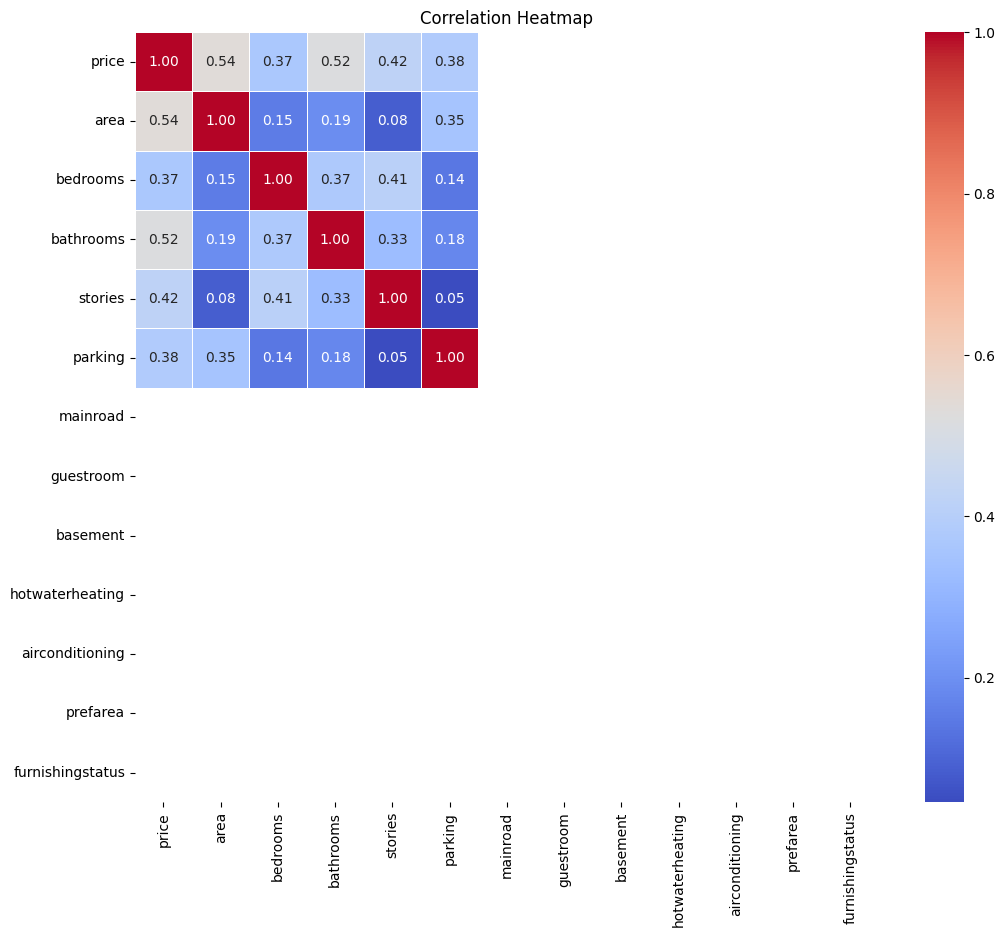

In [9]:
df = pd.DataFrame(processed_house_price_df, columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<!-- BEGIN QUESTION -->

**Question 5:** What insight can you derive from this data?

There was a moderate positive corelation between price and number of bedrooms. 

<!-- END QUESTION -->

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)